In [17]:
import seaborn as sns
import json
import pandas as pd

In [18]:
datasets = ["cifar100"]

In [19]:
# Import results per dataset

def df_per_dataset(dataset_name):
    print(dataset_name)
    f = open(f'/nethome/bdevnani3/vis_lang/efficient_finetuning/raw_embedding_generation/results/{dataset_name}/all.json',)
    results = json.load(f)

    out = []

    for experiment in results:
        if experiment != "weighted_image_and_text_embedding":
            for num_classes in results[experiment]:
                for it in results[experiment][num_classes]:
                    out.append([experiment, int(num_classes), float(it)])
                    
    df = pd.DataFrame(out, columns=["experiment", "instances_per_class", "accuracy"])
    df['dataset'] = dataset_name
    return df

all_data = []
for dataset in datasets:
    all_data.append(df_per_dataset(dataset))
    
all_data = pd.concat(all_data)


cifar100


In [20]:
def df_per_dataset_weighted(dataset_name):
    f = open(f'/nethome/bdevnani3/vis_lang/efficient_finetuning/raw_embedding_generation/results/{dataset_name}/all.json',)
    results = json.load(f)

    out = []
    for num_classes in results["weighted_image_and_text_embedding"]:
        for i,d in enumerate(results["weighted_image_and_text_embedding"][num_classes]):
            for lam in d:
                out.append([int(num_classes), lam, d[lam]])

    df2 = pd.DataFrame(out, columns=["instances_per_class","lam", "accuracy"])
    df2['dataset'] = dataset_name
    df2['experiment'] = "weighted_image_and_text_embedding"
    df2["lam"] = pd.to_numeric(df2["lam"])
    df2["lam"] = df2["lam"].round(decimals = 2)
    
    return df2
all_weighted_data = []
for dataset in datasets:
    all_weighted_data.append(df_per_dataset_weighted(dataset))
    
all_weighted_data = pd.concat(all_weighted_data)

all_weighted_data.lam.unique()

# instances_per_class = -1
# df_e = df2[df2.instances_per_class == instances_per_class]
# ax = sns.lineplot(data=df_e, x="lam", y="accuracy", marker="o")
# ax.set_title(f"weighted_image_and_text_embedding - instances_per_class: {instances_per_class}")

array([0.  , 0.05, 0.11, 0.16, 0.21, 0.26, 0.32, 0.37, 0.42, 0.47, 0.53,
       0.58, 0.63, 0.68, 0.74, 0.79, 0.84, 0.89, 0.95, 1.  ])

In [21]:
all_weighted_data

,instances_per_class,lam,accuracy,dataset,experiment
0,1,0.00,0.6245,cifar100,weighted_image_and_text_embedding
1,1,0.05,0.3395,cifar100,weighted_image_and_text_embedding
2,1,0.11,0.3246,cifar100,weighted_image_and_text_embedding
3,1,0.16,0.3209,cifar100,weighted_image_and_text_embedding
4,1,0.21,0.3194,cifar100,weighted_image_and_text_embedding
...,...,...,...,...,...
755,-1,0.79,0.7937,cifar100,weighted_image_and_text_embedding
756,-1,0.84,0.7937,cifar100,weighted_image_and_text_embedding
757,-1,0.89,0.7936,cifar100,weighted_image_and_text_embedding
758,-1,0.95,0.7937,cifar100,weighted_image_and_text_embedding


In [23]:
all_data[all_data.experiment == "clip_linear_probe"]

,experiment,instances_per_class,accuracy,dataset
83,clip_linear_probe,1,0.3116,cifar100
84,clip_linear_probe,1,0.3116,cifar100
85,clip_linear_probe,1,0.3216,cifar100
86,clip_linear_probe,2,0.3977,cifar100
87,clip_linear_probe,2,0.3699,cifar100
88,clip_linear_probe,2,0.3643,cifar100
89,clip_linear_probe,4,0.4383,cifar100
90,clip_linear_probe,4,0.4658,cifar100
91,clip_linear_probe,4,0.4454,cifar100
92,clip_linear_probe,8,0.5116,cifar100


In [24]:
random_image_embedding = all_data[all_data.experiment == "random_image_embedding"]
random_image_embedding_from_class = all_data[all_data.experiment == "random_image_embedding_from_class"]
nearest_image_embedding = all_data[all_data.experiment == "nearest_image_embedding"]
average_image_embedding = all_data[all_data.experiment == "average_image_embedding"]
average_image_and_text_embedding = all_data[all_data.experiment == "weighted_image_and_text_embedding_0_5"]
linear_probe = all_data[all_data.experiment == "clip_linear_probe"]
weighted_image_and_text_embedding =all_data[all_data.experiment == "weighted_image_and_text_embedding"] 

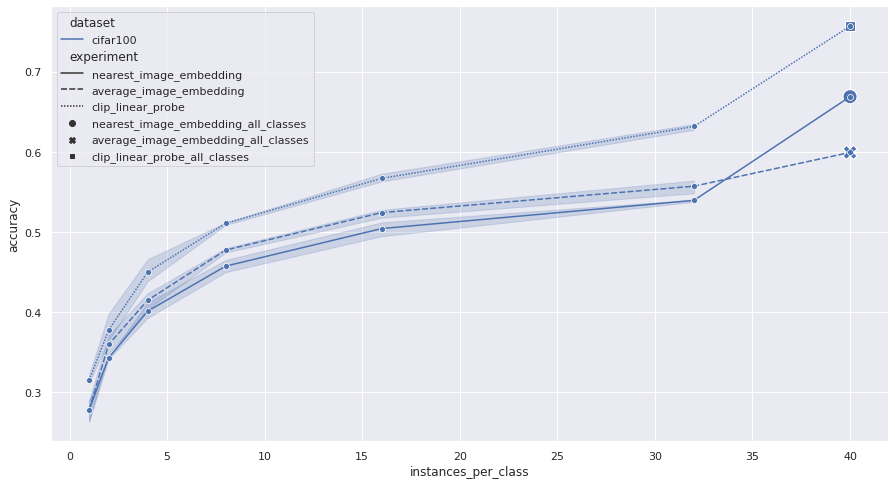

In [25]:
# Vision Graph
import matplotlib.pyplot as plt


# Linear probe

datasets = [
    "cifar100", 
    "flowers102", 
    "food101", 
    "oxfordpets"
]

import numpy as np

vision = pd.concat([nearest_image_embedding, average_image_embedding, linear_probe])
sns.set(rc = {'figure.figsize':(15,8)})

# Pretty stars
expts = ["nearest_image_embedding", "average_image_embedding", "clip_linear_probe"]
apnd = []

for exp in expts:
    for dataset in datasets:
        tmp = vision.loc[(vision['experiment']==exp) & (vision['instances_per_class']==-1) & (vision['dataset']==dataset)]
        y = np.mean(tmp["accuracy"])
        apnd.append([exp + "_all_classes", 40, y, "_"+dataset])
        
apnd = pd.DataFrame(apnd, columns=["_experiment", "instances_per_class", "accuracy", "_dataset"])
        
# vision = vision[vision.instances_per_class != -1]

dataset = "cifar100"
# dataset = "flowers102" 
# dataset = "food101"
# dataset = "oxfordpets"

vision = vision.replace(-1, 40)
apnd = apnd[apnd._dataset== "_"+dataset]
vision = vision[vision.dataset==dataset]
ax2 = sns.scatterplot(data=apnd, x="instances_per_class", y="accuracy", marker="*", hue="_dataset", style="_experiment", s=200)
ax = sns.lineplot(data=vision, x="instances_per_class", y="accuracy", marker="o", hue="dataset", style="experiment")



plt.show()

<AxesSubplot:xlabel='instances_per_class', ylabel='accuracy'>

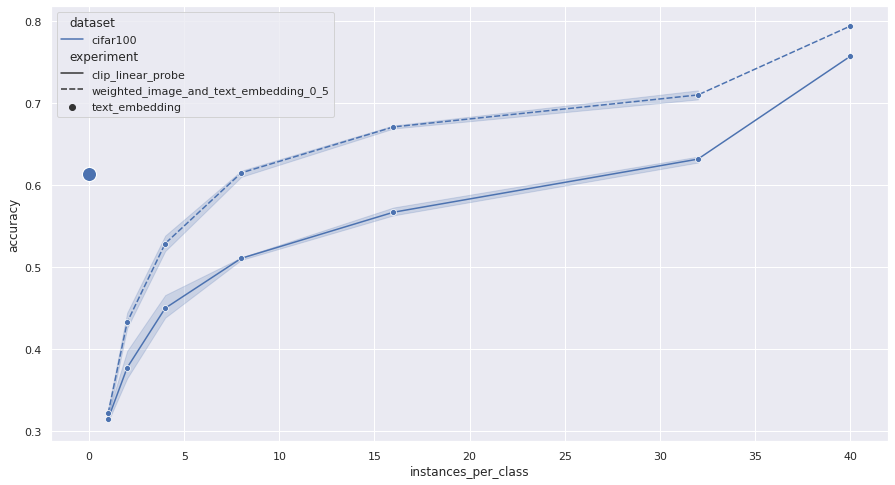

In [26]:
import numpy as np

# Plot 2

# vision = pd.concat([average_image_embedding, average_image_and_text_embedding])
vision = pd.concat([linear_probe, average_image_and_text_embedding])
sns.set(rc = {'figure.figsize':(15,8)})

# Pretty stars
expts = ["average_image_embedding", "weighted_image_and_text_embedding_0_5", "weighted_image_and_text_embedding"]
apnd = []

for exp in expts:
    for dataset in datasets:
        tmp = vision.loc[(vision['experiment']==exp) & (vision['instances_per_class']==-1) & (vision['dataset']==dataset)]
        y = np.mean(tmp["accuracy"])
        apnd.append([exp, -1, y, "_"+dataset])
        
apnd = pd.DataFrame(apnd, columns=["_experiment", "instances_per_class", "accuracy", "_dataset"])

dataset = "cifar100"
# dataset = "flowers102" 
# dataset = "food101"
# dataset = "oxfordpets"

        
# vision = vision[vision.instances_per_class != -1]
vision = vision.replace(-1, 40)
vision = vision[vision.dataset==dataset]
# ax2 = sns.scatterplot(data=apnd, x="instances_per_class", y="accuracy", marker="*", hue="_dataset", style="_experiment", s=200)
ax = sns.lineplot(data=vision, x="instances_per_class", y="accuracy", marker="o", hue="dataset", style="experiment")

clip_results = [["text_embedding", 0, .6137, "_"+"cifar100"],
                ["text_embedding", 0, .6251, "_"+"flowers102"],
                ["text_embedding", 0, .8997, "_"+"food101"],
                ["text_embedding", 0, .7813, "_"+"oxfordpets"]]

clip_results = pd.DataFrame(clip_results, columns=["_experiment", "instances_per_class", "accuracy", "_dataset"])
clip_results = clip_results[clip_results._dataset=="_"+dataset]
sns.scatterplot(data=clip_results, x="instances_per_class", y="accuracy", hue="_dataset", style="_experiment", s=200)

# lambda_plots = []

# for dataset in datasets:
#     tmp = vision.loc[(vision['experiment']==exp) & (vision['instances_per_class']==-1) & (vision['dataset']==dataset)]
#     y = np.mean(tmp["accuracy"])
#     apnd.append([exp, 40, y, "_"+dataset])


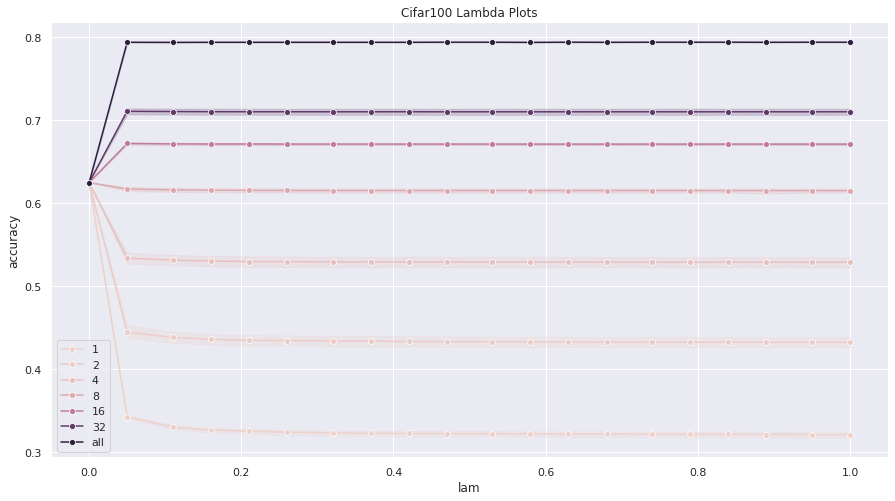

In [31]:
# Lambda plots

all_weighted_data_cifar = all_weighted_data[all_weighted_data.dataset == "cifar100"]


all_weighted_data_cifar = all_weighted_data_cifar.replace(-1, 40)
ax = sns.lineplot(data=all_weighted_data_cifar, 
                  x="lam", y="accuracy", marker="o", hue="instances_per_class", legend="full")
ax.set_title("Cifar100 Lambda Plots")
ax.legend(labels=[1,2,4,8,16,32,"all"])


Text(0.5, 1.0, 'Flowers102 Lambda Plots')

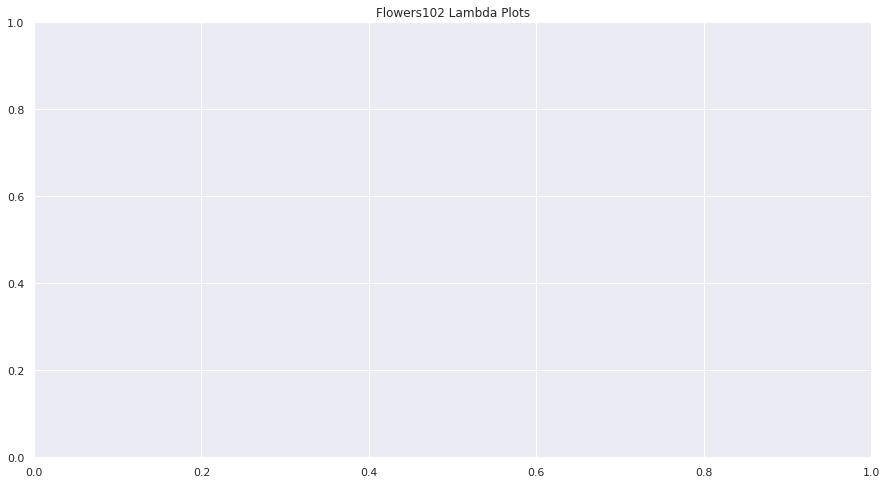

In [28]:
# Lambda plots

all_weighted_data_cifar = all_weighted_data[all_weighted_data.dataset == "flowers102"]

ax = sns.lineplot(data=all_weighted_data_cifar, 
                  x="lam", y="accuracy", marker="o", hue="instances_per_class", legend="full")
ax.set_title("Flowers102 Lambda Plots")


Text(0.5, 1.0, 'OxfordPets Lambda Plots')

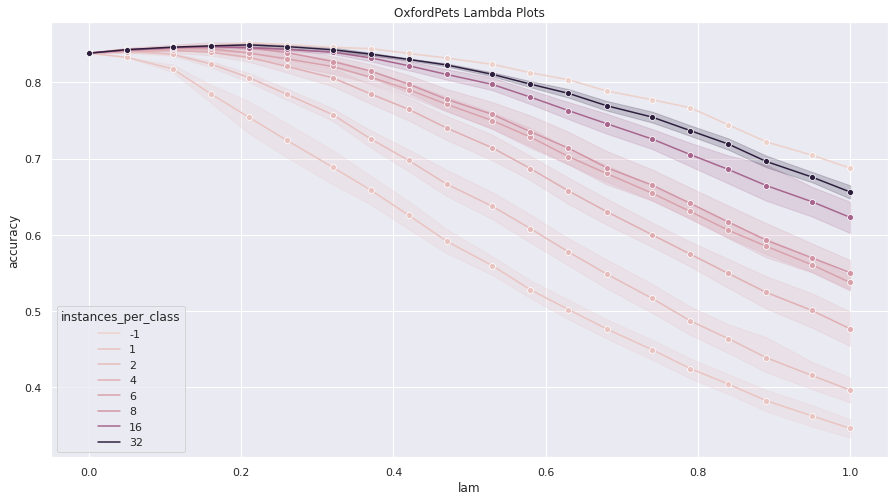

In [56]:
# Lambda plots

all_weighted_data_cifar = all_weighted_data[all_weighted_data.dataset == "oxfordpets"]

ax = sns.lineplot(data=all_weighted_data_cifar, 
                  x="lam", y="accuracy", marker="o", hue="instances_per_class", legend="full")
ax.set_title("OxfordPets Lambda Plots")

Text(0.5, 1.0, 'Food101 Lambda Plots')

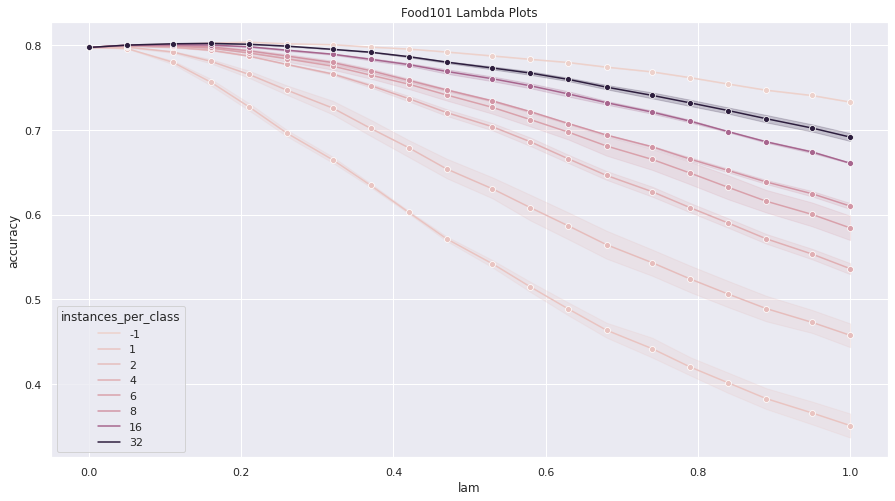

In [57]:
# Lambda plots

all_weighted_data_cifar = all_weighted_data[all_weighted_data.dataset == "food101"]

ax = sns.lineplot(data=all_weighted_data_cifar, 
                  x="lam", y="accuracy", marker="o", hue="instances_per_class", legend="full")
ax.set_title("Food101 Lambda Plots")